<a href="https://colab.research.google.com/github/Zulema-Rodriguez/Challenge-TelecomX-ALURA/blob/main/Challenge_Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import requests

In [100]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

In [101]:
df = pd.DataFrame(data)

In [102]:
df.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [103]:
df = df.rename(columns={
    'customerID': 'ID_cliente',
    'churn': 'cancelaci√≥n',
    'customer': 'cliente',
    'phone': 'tel√©fono',
    'internet': 'internet',
    'account': 'cuenta'
})

In [104]:
df.head()

ID_cliente Churn                                            cliente  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                          tel√©fono  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                              cuenta  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [105]:

cliente_df = pd.json_normalize(df['cliente'])
tel√©fono_df = pd.json_normalize(df['tel√©fono'])
internet_df = pd.json_normalize(df['internet'])
cuenta_df = pd.json_normalize(df['cuenta'])


df = pd.concat([df.drop(['cliente', 'tel√©fono', 'internet', 'cuenta'], axis=1),
                cliente_df, tel√©fono_df, internet_df, cuenta_df], axis=1)

In [106]:
df.head()

ID_cliente Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   

  PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0              Yes      Mailed check            65.6          593.3  
1               No      Mailed check            59.9          542.4  
2              Yes  Electronic check            73.9         280.85  
3              Yes  Electronic check            98.0        1237.85  
4              Yes      Mailed check            83.9          267.4  

[5 rows x 21 columns]

In [107]:
df.columns

Index(['ID_cliente', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [108]:
df = df.rename(columns={
    'gender': 'g√©nero',
    'SeniorCitizen': 'adulto_mayor',
    'Partner': 'pareja',
    'Dependents': 'dependientes',
    'tenure': 'antig√ºedad_meses',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_online',
    'OnlineBackup': 'respaldo_online',
    'DeviceProtection': 'protecci√≥n_dispositivo',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'tv_streaming',
    'StreamingMovies': 'peliculas_streaming',
    'Contract': 'contrato',
    'PaperlessBilling': 'factura_electronica',
    'PaymentMethod': 'm√©todo_pago',
    'MonthlyCharges': 'cargo_mensual',
    'TotalCharges': 'cargo_total'
})

In [109]:
df.head()

ID_cliente Churn  g√©nero  adulto_mayor pareja dependientes  \
0  0002-ORFBO    No  Female             0    Yes          Yes   
1  0003-MKNFE    No    Male             0     No           No   
2  0004-TLHLJ   Yes    Male             0     No           No   
3  0011-IGKFF   Yes    Male             1    Yes           No   
4  0013-EXCHZ   Yes  Female             1    Yes           No   

   antig√ºedad_meses servicio_telefonico lineas_multiples servicio_internet  \
0                 9                 Yes               No               DSL   
1                 9                 Yes              Yes               DSL   
2                 4                 Yes               No       Fiber optic   
3                13                 Yes               No       Fiber optic   
4                 3                 Yes               No       Fiber optic   

   ... respaldo_online protecci√≥n_dispositivo soporte_tecnico tv_streaming  \
0  ...             Yes                     No             Yes          Yes   
1  ...              No                     No              No           No   
2  ...              No                    Yes              No           No   
3  ...             Yes                    Yes              No          Yes   
4  ...              No                     No             Yes          Yes   

  peliculas_streaming        contrato factura_electronica       m√©todo_pago  \
0                  No        One year                 Yes      Mailed check   
1                 Yes  Month-to-month                  No      Mailed check   
2                  No  Month-to-month                 Yes  Electronic check   
3                 Yes  Month-to-month                 Yes  Electronic check   
4                  No  Month-to-month                 Yes      Mailed check   

  Charges.Monthly  Charges.Total  
0            65.6          593.3  
1            59.9          542.4  
2            73.9         280.85  
3            98.0        1237.85  
4            83.9          267.4  

[5 rows x 21 columns]

In [110]:
traducciones = {
    "Male": "Hombre",
    "Female": "Mujer",
    "Yes": "S√≠",
    "No": "No",
    "No phone service": "Sin servicio telef√≥nico",
    "No internet service": "Sin servicio de internet",

    "DSL": "DSL",
    "Fiber optic": "Fibra √≥ptica",
    "Month-to-month": "Mes a mes",
    "One year": "Un a√±o",
    "Two year": "Dos a√±os",

    "Electronic check": "Cheque electr√≥nico",
    "Mailed check": "Cheque por correo",
    "Bank transfer (automatic)": "Transferencia bancaria (autom√°tica)",
    "Credit card (automatic)": "Tarjeta de cr√©dito (autom√°tica)",

    "Partner": "Pareja",
    "Dependents": "Personas a cargo",

    "PaperlessBilling": "Factura electr√≥nica",

    "StreamingTV": "TV por streaming",
    "StreamingMovies": "Pel√≠culas por streaming",
    "OnlineSecurity": "Seguridad en l√≠nea",
    "OnlineBackup": "Respaldo en l√≠nea",
    "DeviceProtection": "Protecci√≥n de dispositivo",
    "TechSupport": "Soporte t√©cnico",

    "Churn": "Cancelaci√≥n"
}

In [111]:
df = df.replace(traducciones)

In [112]:
df.head()

ID_cliente Churn  g√©nero  adulto_mayor pareja dependientes  \
0  0002-ORFBO    No   Mujer             0     S√≠           S√≠   
1  0003-MKNFE    No  Hombre             0     No           No   
2  0004-TLHLJ    S√≠  Hombre             0     No           No   
3  0011-IGKFF    S√≠  Hombre             1     S√≠           No   
4  0013-EXCHZ    S√≠   Mujer             1     S√≠           No   

   antig√ºedad_meses servicio_telefonico lineas_multiples servicio_internet  \
0                 9                  S√≠               No               DSL   
1                 9                  S√≠               S√≠               DSL   
2                 4                  S√≠               No      Fibra √≥ptica   
3                13                  S√≠               No      Fibra √≥ptica   
4                 3                  S√≠               No      Fibra √≥ptica   

   ... respaldo_online protecci√≥n_dispositivo soporte_tecnico tv_streaming  \
0  ...              S√≠                     No              S√≠           S√≠   
1  ...              No                     No              No           No   
2  ...              No                     S√≠              No           No   
3  ...              S√≠                     S√≠              No           S√≠   
4  ...              No                     No              S√≠           S√≠   

  peliculas_streaming   contrato factura_electronica         m√©todo_pago  \
0                  No     Un a√±o                  S√≠   Cheque por correo   
1                  S√≠  Mes a mes                  No   Cheque por correo   
2                  No  Mes a mes                  S√≠  Cheque electr√≥nico   
3                  S√≠  Mes a mes                  S√≠  Cheque electr√≥nico   
4                  No  Mes a mes                  S√≠   Cheque por correo   

  Charges.Monthly  Charges.Total  
0            65.6          593.3  
1            59.9          542.4  
2            73.9         280.85  
3            98.0        1237.85  
4            83.9          267.4  

[5 rows x 21 columns]

In [113]:
df.dtypes

ID_cliente                 object
Churn                      object
g√©nero                     object
adulto_mayor                int64
pareja                     object
dependientes               object
antig√ºedad_meses            int64
servicio_telefonico        object
lineas_multiples           object
servicio_internet          object
seguridad_online           object
respaldo_online            object
protecci√≥n_dispositivo     object
soporte_tecnico            object
tv_streaming               object
peliculas_streaming        object
contrato                   object
factura_electronica        object
m√©todo_pago                object
Charges.Monthly           float64
Charges.Total              object
dtype: object

In [114]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

In [115]:
df['Charges.Total'].isna().sum()

np.int64(11)

In [116]:
df.dtypes

ID_cliente                 object
Churn                      object
g√©nero                     object
adulto_mayor                int64
pareja                     object
dependientes               object
antig√ºedad_meses            int64
servicio_telefonico        object
lineas_multiples           object
servicio_internet          object
seguridad_online           object
respaldo_online            object
protecci√≥n_dispositivo     object
soporte_tecnico            object
tv_streaming               object
peliculas_streaming        object
contrato                   object
factura_electronica        object
m√©todo_pago                object
Charges.Monthly           float64
Charges.Total             float64
dtype: object

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_cliente              7267 non-null   object 
 1   Churn                   7267 non-null   object 
 2   g√©nero                  7267 non-null   object 
 3   adulto_mayor            7267 non-null   int64  
 4   pareja                  7267 non-null   object 
 5   dependientes            7267 non-null   object 
 6   antig√ºedad_meses        7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   object 
 8   lineas_multiples        7267 non-null   object 
 9   servicio_internet       7267 non-null   object 
 10  seguridad_online        7267 non-null   object 
 11  respaldo_online         7267 non-null   object 
 12  protecci√≥n_dispositivo  7267 non-null   object 
 13  soporte_tecnico         7267 non-null   object 
 14  tv_streaming            7267 non-null

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_cliente              7267 non-null   object 
 1   Churn                   7267 non-null   object 
 2   g√©nero                  7267 non-null   object 
 3   adulto_mayor            7267 non-null   int64  
 4   pareja                  7267 non-null   object 
 5   dependientes            7267 non-null   object 
 6   antig√ºedad_meses        7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   object 
 8   lineas_multiples        7267 non-null   object 
 9   servicio_internet       7267 non-null   object 
 10  seguridad_online        7267 non-null   object 
 11  respaldo_online         7267 non-null   object 
 12  protecci√≥n_dispositivo  7267 non-null   object 
 13  soporte_tecnico         7267 non-null   object 
 14  tv_streaming            7267 non-null

In [119]:
df.isnull().sum()

ID_cliente                 0
Churn                      0
g√©nero                     0
adulto_mayor               0
pareja                     0
dependientes               0
antig√ºedad_meses           0
servicio_telefonico        0
lineas_multiples           0
servicio_internet          0
seguridad_online           0
respaldo_online            0
protecci√≥n_dispositivo     0
soporte_tecnico            0
tv_streaming               0
peliculas_streaming        0
contrato                   0
factura_electronica        0
m√©todo_pago                0
Charges.Monthly            0
Charges.Total             11
dtype: int64

In [120]:
df = df.dropna(subset=['Charges.Total'])

In [121]:
df.isnull().sum()

ID_cliente                0
Churn                     0
g√©nero                    0
adulto_mayor              0
pareja                    0
dependientes              0
antig√ºedad_meses          0
servicio_telefonico       0
lineas_multiples          0
servicio_internet         0
seguridad_online          0
respaldo_online           0
protecci√≥n_dispositivo    0
soporte_tecnico           0
tv_streaming              0
peliculas_streaming       0
contrato                  0
factura_electronica       0
m√©todo_pago               0
Charges.Monthly           0
Charges.Total             0
dtype: int64

### Limpieza de datos

In [122]:
columnas_categoricas = [
    'g√©nero', 'adulto_mayor', 'pareja', 'dependientes',
    'servicio_telefonico', 'lineas_multiples', 'servicio_internet',
    'seguridad_online', 'respaldo_online', 'protecci√≥n_dispositivo',
    'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
    'contrato', 'factura_electronica', 'm√©todo_pago', 'Churn'
]

for columna in columnas_categoricas:
    print(f"{columna}: {df[columna].unique()}\n")

g√©nero: ['Mujer' 'Hombre']

adulto_mayor: [0 1]

pareja: ['S√≠' 'No']

dependientes: ['S√≠' 'No']

servicio_telefonico: ['S√≠' 'No']

lineas_multiples: ['No' 'S√≠' 'Sin servicio telef√≥nico']

servicio_internet: ['DSL' 'Fibra √≥ptica' 'No']

seguridad_online: ['No' 'S√≠' 'Sin servicio de internet']

respaldo_online: ['S√≠' 'No' 'Sin servicio de internet']

protecci√≥n_dispositivo: ['No' 'S√≠' 'Sin servicio de internet']

soporte_tecnico: ['S√≠' 'No' 'Sin servicio de internet']

tv_streaming: ['S√≠' 'No' 'Sin servicio de internet']

peliculas_streaming: ['No' 'S√≠' 'Sin servicio de internet']

contrato: ['Un a√±o' 'Mes a mes' 'Dos a√±os']

factura_electronica: ['S√≠' 'No']

m√©todo_pago: ['Cheque por correo' 'Cheque electr√≥nico'
 'Tarjeta de cr√©dito (autom√°tica)' 'Transferencia bancaria (autom√°tica)']

Churn: ['No' 'S√≠' '']



In [123]:
columnas_servicios = [
    'seguridad_online', 'respaldo_online', 'protecci√≥n_dispositivo',
    'soporte_tecnico', 'tv_streaming', 'peliculas_streaming'
]

for col in columnas_servicios:
    df[col] = df[col].replace('Sin servicio de internet', 'No')

In [124]:
import numpy as np
df['Churn']=df['Churn'].replace('',np.nan)

In [125]:
df['Churn'].isnull().sum()

np.int64(224)

In [126]:
import numpy as np
df['Churn']=df['Churn'].replace('',np.nan)

In [127]:
df['Churn'].isna().sum()

np.int64(224)

In [128]:
df.dropna(subset=['Churn'], inplace=True)

In [129]:
df['Churn'].isnull().sum()

np.int64(0)

In [130]:
df['Churn'].value_counts()

Churn
No    5163
S√≠    1869
Name: count, dtype: int64

### Manejo de inconsistencias

In [131]:
df.select_dtypes(include='object').nunique()

ID_cliente                7032
Churn                        2
g√©nero                       2
pareja                       2
dependientes                 2
servicio_telefonico          2
lineas_multiples             3
servicio_internet            3
seguridad_online             2
respaldo_online              2
protecci√≥n_dispositivo       2
soporte_tecnico              2
tv_streaming                 2
peliculas_streaming          2
contrato                     3
factura_electronica          2
m√©todo_pago                  4
dtype: int64

In [132]:
df['lineas_multiples'].unique()

array(['No', 'S√≠', 'Sin servicio telef√≥nico'], dtype=object)

In [133]:
df['lineas_multiples'] = df['lineas_multiples'].replace('Sin servicio telef√≥nico', 'No')

In [134]:
df['lineas_multiples'].unique()


array(['No', 'S√≠'], dtype=object)

In [135]:
df['servicio_internet'].unique()


array(['DSL', 'Fibra √≥ptica', 'No'], dtype=object)

In [136]:
df['contrato'].unique()


array(['Un a√±o', 'Mes a mes', 'Dos a√±os'], dtype=object)

In [137]:
df['m√©todo_pago'].unique()


array(['Cheque por correo', 'Cheque electr√≥nico',
       'Tarjeta de cr√©dito (autom√°tica)',
       'Transferencia bancaria (autom√°tica)'], dtype=object)

In [138]:
df.select_dtypes(include='object').nunique()

ID_cliente                7032
Churn                        2
g√©nero                       2
pareja                       2
dependientes                 2
servicio_telefonico          2
lineas_multiples             2
servicio_internet            3
seguridad_online             2
respaldo_online              2
protecci√≥n_dispositivo       2
soporte_tecnico              2
tv_streaming                 2
peliculas_streaming          2
contrato                     3
factura_electronica          2
m√©todo_pago                  4
dtype: int64

### Convertir a minusculas y quitar espacios

In [139]:
print(df['contrato'].unique())
print(df['m√©todo_pago'].unique())

['Un a√±o' 'Mes a mes' 'Dos a√±os']
['Cheque por correo' 'Cheque electr√≥nico'
 'Tarjeta de cr√©dito (autom√°tica)' 'Transferencia bancaria (autom√°tica)']


In [140]:
df['contrato'].apply(lambda x: f"'{x}'").unique()

array(["'Un a√±o'", "'Mes a mes'", "'Dos a√±os'"], dtype=object)

In [141]:
df['contrato'] = df['contrato'].str.lower().str.strip()
df['m√©todo_pago'] = df['m√©todo_pago'].str.lower().str.strip()

In [142]:
print(df['contrato'].unique())
print(df['m√©todo_pago'].unique())

['un a√±o' 'mes a mes' 'dos a√±os']
['cheque por correo' 'cheque electr√≥nico'
 'tarjeta de cr√©dito (autom√°tica)' 'transferencia bancaria (autom√°tica)']


In [143]:
df.isnull().values.any()

np.False_

In [144]:
# Diccionario con las categor√≠as v√°lidas para cada columna
valores_validos = {
    'g√©nero': ['Masculino', 'Femenino'],
    'adulto_mayor': ['S√≠', 'No'],
    'pareja': ['S√≠', 'No'],
    'dependientes': ['S√≠', 'No'],
    'servicio_telefonico': ['S√≠', 'No'],
    'lineas_multiples': ['S√≠', 'No'],
    'servicio_internet': ['DSL', 'Fibra √≥ptica', 'Sin servicio'],
    'seguridad_online': ['S√≠', 'No'],
    'respaldo_online': ['S√≠', 'No'],
    'protecci√≥n_dispositivo': ['S√≠', 'No'],
    'soporte_tecnico': ['S√≠', 'No'],
    'tv_streaming': ['S√≠', 'No'],
    'peliculas_streaming': ['S√≠', 'No'],
    'contrato': ['Mes a mes', 'Contrato anual', 'Contrato bienal'],
    'factura_electronica': ['S√≠', 'No'],
    'm√©todo_pago': ['Cheque por correo', 'Cheque electr√≥nico', 'Tarjeta de cr√©dito autom√°tica', 'Transferencia bancaria autom√°tica'],
    'Churn': ['S√≠', 'No']
}

# Crear un diccionario para almacenar las filas con valores inv√°lidos por columna
inconsistencias = {}

for columna, valores in valores_validos.items():
    filas_invalidas = df[~df[columna].isin(valores)]
    if not filas_invalidas.empty:
        inconsistencias[columna] = filas_invalidas

# Mostrar reporte de inconsistencias
if inconsistencias:
    for col, filas in inconsistencias.items():
        print(f"---\nValores inv√°lidos en columna '{col}':")
        print(filas[[col]])
else:
    print("¬°No se encontraron valores inv√°lidos en las columnas categ√≥ricas!")

---
Valores inv√°lidos en columna 'g√©nero':
      g√©nero
0      Mujer
1     Hombre
2     Hombre
3     Hombre
4      Mujer
...      ...
7262   Mujer
7263  Hombre
7264  Hombre
7265  Hombre
7266  Hombre

[7032 rows x 1 columns]
---
Valores inv√°lidos en columna 'adulto_mayor':
      adulto_mayor
0                0
1                0
2                0
3                1
4                1
...            ...
7262             0
7263             0
7264             0
7265             0
7266             0

[7032 rows x 1 columns]
---
Valores inv√°lidos en columna 'servicio_internet':
     servicio_internet
20                  No
23                  No
24                  No
27                  No
28                  No
...                ...
7250                No
7252                No
7256                No
7257                No
7261                No

[1520 rows x 1 columns]
---
Valores inv√°lidos en columna 'contrato':
       contrato
0        un a√±o
1     mes a mes
2     mes a mes
3  

In [145]:
# Paso 1: Normalizar texto en las columnas categ√≥ricas (min√∫sculas y sin espacios)
columnas_categoricas = [
    'g√©nero', 'adulto_mayor', 'pareja', 'dependientes',
    'servicio_telefonico', 'lineas_multiples', 'servicio_internet',
    'seguridad_online', 'respaldo_online', 'protecci√≥n_dispositivo',
    'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
    'contrato', 'factura_electronica', 'm√©todo_pago', 'Churn'
]

for col in columnas_categoricas:
    df[col] = df[col].astype(str).str.lower().str.strip()

# Paso 2: Reemplazar sin√≥nimos o variantes para que coincidan con los valores v√°lidos

# Diccionario para reemplazos: clave = lo que aparece en data, valor = forma est√°ndar
reemplazos = {
    # servicio_internet
    'no': 'sin servicio',

    # contrato
    'un a√±o': 'contrato anual',
    'dos a√±os': 'contrato bienal',
    'mes a mes': 'mes a mes',

    # m√©todo_pago
    'cheque por correo': 'cheque por correo',
    'cheque electr√≥nico': 'cheque electr√≥nico',
    'tarjeta de cr√©dito autom√°tica': 'tarjeta de cr√©dito autom√°tica',
    'transferencia bancaria autom√°tica': 'transferencia bancaria autom√°tica'
}

# Aplicar reemplazos solo en las columnas donde aplican
df['servicio_internet'] = df['servicio_internet'].replace(reemplazos)
df['contrato'] = df['contrato'].replace(reemplazos)
df['m√©todo_pago'] = df['m√©todo_pago'].replace(reemplazos)

# Paso 3: Actualizar listas de valores v√°lidos en min√∫sculas para la validaci√≥n

valores_validos = {
    'g√©nero': ['masculino', 'femenino'],
    'adulto_mayor': ['s√≠', 'no'],
    'pareja': ['s√≠', 'no'],
    'dependientes': ['s√≠', 'no'],
    'servicio_telefonico': ['s√≠', 'no'],
    'lineas_multiples': ['s√≠', 'no'],
    'servicio_internet': ['dsl', 'fibra √≥ptica', 'sin servicio'],
    'seguridad_online': ['s√≠', 'no'],
    'respaldo_online': ['s√≠', 'no'],
    'protecci√≥n_dispositivo': ['s√≠', 'no'],
    'soporte_tecnico': ['s√≠', 'no'],
    'tv_streaming': ['s√≠', 'no'],
    'peliculas_streaming': ['s√≠', 'no'],
    'contrato': ['mes a mes', 'contrato anual', 'contrato bienal'],
    'factura_electronica': ['s√≠', 'no'],
    'm√©todo_pago': ['cheque por correo', 'cheque electr√≥nico', 'tarjeta de cr√©dito autom√°tica', 'transferencia bancaria autom√°tica'],
    'churn': ['s√≠', 'no']
}



In [146]:
# Diccionario con las categor√≠as v√°lidas para cada columna
valores_validos = {
    'g√©nero': ['Masculino', 'Femenino'],
    'adulto_mayor': ['S√≠', 'No'],
    'pareja': ['S√≠', 'No'],
    'dependientes': ['S√≠', 'No'],
    'servicio_telefonico': ['S√≠', 'No'],
    'lineas_multiples': ['S√≠', 'No'],
    'servicio_internet': ['DSL', 'Fibra √≥ptica', 'Sin servicio'],
    'seguridad_online': ['S√≠', 'No'],
    'respaldo_online': ['S√≠', 'No'],
    'protecci√≥n_dispositivo': ['S√≠', 'No'],
    'soporte_tecnico': ['S√≠', 'No'],
    'tv_streaming': ['S√≠', 'No'],
    'peliculas_streaming': ['S√≠', 'No'],
    'contrato': ['Mes a mes', 'Contrato anual', 'Contrato bienal'],
    'factura_electronica': ['S√≠', 'No'],
    'm√©todo_pago': ['Cheque por correo', 'Cheque electr√≥nico', 'Tarjeta de cr√©dito autom√°tica', 'Transferencia bancaria autom√°tica'],
    'Churn': ['S√≠', 'No']
}

# Crear un diccionario para almacenar las filas con valores inv√°lidos por columna
inconsistencias = {}

for columna, valores in valores_validos.items():
    filas_invalidas = df[~df[columna].isin(valores)]
    if not filas_invalidas.empty:
        inconsistencias[columna] = filas_invalidas

# Mostrar reporte de inconsistencias
if inconsistencias:
    for col, filas in inconsistencias.items():
        print(f"---\nValores inv√°lidos en columna '{col}':")
        print(filas[[col]])
else:
    print("¬°No se encontraron valores inv√°lidos en las columnas categ√≥ricas!")

---
Valores inv√°lidos en columna 'g√©nero':
      g√©nero
0      mujer
1     hombre
2     hombre
3     hombre
4      mujer
...      ...
7262   mujer
7263  hombre
7264  hombre
7265  hombre
7266  hombre

[7032 rows x 1 columns]
---
Valores inv√°lidos en columna 'adulto_mayor':
     adulto_mayor
0               0
1               0
2               0
3               1
4               1
...           ...
7262            0
7263            0
7264            0
7265            0
7266            0

[7032 rows x 1 columns]
---
Valores inv√°lidos en columna 'pareja':
     pareja
0        s√≠
1        no
2        no
3        s√≠
4        s√≠
...     ...
7262     no
7263     s√≠
7264     no
7265     s√≠
7266     s√≠

[7032 rows x 1 columns]
---
Valores inv√°lidos en columna 'dependientes':
     dependientes
0              s√≠
1              no
2              no
3              no
4              no
...           ...
7262           no
7263           no
7264           no
7265           s√≠
7266         

In [147]:
columnas_categoricas = [
    'g√©nero', 'adulto_mayor', 'pareja', 'dependientes',
    'servicio_telefonico', 'lineas_multiples', 'servicio_internet',
    'seguridad_online', 'respaldo_online', 'protecci√≥n_dispositivo',
    'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
    'contrato', 'factura_electronica', 'm√©todo_pago', 'Churn'
]

for col in columnas_categoricas:
    print(f"Valores √∫nicos en la columna '{col}':")
    print(df[col].unique())
    print('---')

Valores √∫nicos en la columna 'g√©nero':
['mujer' 'hombre']
---
Valores √∫nicos en la columna 'adulto_mayor':
['0' '1']
---
Valores √∫nicos en la columna 'pareja':
['s√≠' 'no']
---
Valores √∫nicos en la columna 'dependientes':
['s√≠' 'no']
---
Valores √∫nicos en la columna 'servicio_telefonico':
['s√≠' 'no']
---
Valores √∫nicos en la columna 'lineas_multiples':
['no' 's√≠']
---
Valores √∫nicos en la columna 'servicio_internet':
['dsl' 'fibra √≥ptica' 'sin servicio']
---
Valores √∫nicos en la columna 'seguridad_online':
['no' 's√≠']
---
Valores √∫nicos en la columna 'respaldo_online':
['s√≠' 'no']
---
Valores √∫nicos en la columna 'protecci√≥n_dispositivo':
['no' 's√≠']
---
Valores √∫nicos en la columna 'soporte_tecnico':
['s√≠' 'no']
---
Valores √∫nicos en la columna 'tv_streaming':
['s√≠' 'no']
---
Valores √∫nicos en la columna 'peliculas_streaming':
['no' 's√≠']
---
Valores √∫nicos en la columna 'contrato':
['contrato anual' 'mes a mes' 'contrato bienal']
---
Valores √∫nicos en la co

In [148]:
valores_validos = {
    'g√©nero': ['mujer', 'hombre'],
    'adulto_mayor': ['0', '1'],
    'pareja': ['s√≠', 'no'],
    'dependientes': ['s√≠', 'no'],
    'servicio_telefonico': ['s√≠', 'no'],
    'lineas_multiples': ['no', 's√≠'],
    'servicio_internet': ['dsl', 'fibra √≥ptica', 'sin servicio'],
    'seguridad_online': ['no', 's√≠'],
    'respaldo_online': ['s√≠', 'no'],
    'protecci√≥n_dispositivo': ['no', 's√≠'],
    'soporte_tecnico': ['s√≠', 'no'],
    'tv_streaming': ['s√≠', 'no'],
    'peliculas_streaming': ['no', 's√≠'],
    'contrato': ['contrato anual', 'mes a mes', 'contrato bienal'],
    'factura_electronica': ['s√≠', 'no'],
    'm√©todo_pago': ['cheque por correo', 'cheque electr√≥nico', 'tarjeta de cr√©dito (autom√°tica)', 'transferencia bancaria (autom√°tica)'],
    'Churn': ['no', 's√≠']
}

In [149]:
# Mostrar todas las columnas con su tipo de dato
print(df.dtypes)

# Filtrar solo las columnas num√©ricas
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Columnas num√©ricas encontradas:")
print(columnas_numericas)

ID_cliente                 object
Churn                      object
g√©nero                     object
adulto_mayor               object
pareja                     object
dependientes               object
antig√ºedad_meses            int64
servicio_telefonico        object
lineas_multiples           object
servicio_internet          object
seguridad_online           object
respaldo_online            object
protecci√≥n_dispositivo     object
soporte_tecnico            object
tv_streaming               object
peliculas_streaming        object
contrato                   object
factura_electronica        object
m√©todo_pago                object
Charges.Monthly           float64
Charges.Total             float64
dtype: object
Columnas num√©ricas encontradas:
['antig√ºedad_meses', 'Charges.Monthly', 'Charges.Total']


In [150]:
antiguedad_fuera_rango = df[df['antig√ºedad_meses']<0]

In [151]:
charges_monthly_fuera_rango = df[df['Charges.Monthly']<0]

In [152]:
charges_total_fuera_rango = df[df['Charges.Total']<0] | (df['Charges.Total'] < df['Charges.Monthly'])

In [153]:
print("Filas con 'antig√ºedad_meses' fuera de rango:")
print(antiguedad_fuera_rango)



Filas con 'antig√ºedad_meses' fuera de rango:
Empty DataFrame
Columns: [ID_cliente, Churn, g√©nero, adulto_mayor, pareja, dependientes, antig√ºedad_meses, servicio_telefonico, lineas_multiples, servicio_internet, seguridad_online, respaldo_online, protecci√≥n_dispositivo, soporte_tecnico, tv_streaming, peliculas_streaming, contrato, factura_electronica, m√©todo_pago, Charges.Monthly, Charges.Total]
Index: []

[0 rows x 21 columns]


In [154]:

print("\nFilas con 'Charges.Monthly' fuera de rango:")
print(charges_monthly_fuera_rango)



Filas con 'Charges.Monthly' fuera de rango:
Empty DataFrame
Columns: [ID_cliente, Churn, g√©nero, adulto_mayor, pareja, dependientes, antig√ºedad_meses, servicio_telefonico, lineas_multiples, servicio_internet, seguridad_online, respaldo_online, protecci√≥n_dispositivo, soporte_tecnico, tv_streaming, peliculas_streaming, contrato, factura_electronica, m√©todo_pago, Charges.Monthly, Charges.Total]
Index: []

[0 rows x 21 columns]


In [155]:
print("\nFilas con 'Charges.Total' fuera de rango:")
print(charges_total_fuera_rango)


Filas con 'Charges.Total' fuera de rango:
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 99, 100, 101, 102, 103, ...]
Index: []

[0 rows x 7053 columns]


In [156]:
df = df.rename(columns={
    'Charges.Monthly': 'cargos_mensuales',
    'Charges.Total': 'cargos_totales'
})


In [157]:
print(df.columns)

Index(['ID_cliente', 'Churn', 'g√©nero', 'adulto_mayor', 'pareja',
       'dependientes', 'antig√ºedad_meses', 'servicio_telefonico',
       'lineas_multiples', 'servicio_internet', 'seguridad_online',
       'respaldo_online', 'protecci√≥n_dispositivo', 'soporte_tecnico',
       'tv_streaming', 'peliculas_streaming', 'contrato',
       'factura_electronica', 'm√©todo_pago', 'cargos_mensuales',
       'cargos_totales'],
      dtype='object')


### Columna de cuentas diarias


In [158]:
df['Cuentas_Diarias'] = df['cargos_mensuales'] / 30


In [159]:
print(df[['cargos_mensuales', 'Cuentas_Diarias']].head())

   cargos_mensuales  Cuentas_Diarias
0              65.6         2.186667
1              59.9         1.996667
2              73.9         2.463333
3              98.0         3.266667
4              83.9         2.796667


### Estandarizaci√≥n y transformaci√≥n de datos

In [160]:
# 1Ô∏è‚É£ Verificar nombres de columnas
print("Nombres de columnas actuales:")
print(df.columns)
print('---')

# 2Ô∏è‚É£ Verificar valores √∫nicos de columnas categ√≥ricas
columnas_categoricas = [
    'g√©nero', 'adulto_mayor', 'pareja', 'dependientes',
    'servicio_telefonico', 'lineas_multiples', 'servicio_internet',
    'seguridad_online', 'respaldo_online', 'protecci√≥n_dispositivo',
    'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
    'contrato', 'factura_electronica', 'm√©todo_pago', 'Churn'
]

for col in columnas_categoricas:
    print(f"Valores √∫nicos en la columna '{col}':")
    print(df[col].unique())
    print('---')

Nombres de columnas actuales:
Index(['ID_cliente', 'Churn', 'g√©nero', 'adulto_mayor', 'pareja',
       'dependientes', 'antig√ºedad_meses', 'servicio_telefonico',
       'lineas_multiples', 'servicio_internet', 'seguridad_online',
       'respaldo_online', 'protecci√≥n_dispositivo', 'soporte_tecnico',
       'tv_streaming', 'peliculas_streaming', 'contrato',
       'factura_electronica', 'm√©todo_pago', 'cargos_mensuales',
       'cargos_totales', 'Cuentas_Diarias'],
      dtype='object')
---
Valores √∫nicos en la columna 'g√©nero':
['mujer' 'hombre']
---
Valores √∫nicos en la columna 'adulto_mayor':
['0' '1']
---
Valores √∫nicos en la columna 'pareja':
['s√≠' 'no']
---
Valores √∫nicos en la columna 'dependientes':
['s√≠' 'no']
---
Valores √∫nicos en la columna 'servicio_telefonico':
['s√≠' 'no']
---
Valores √∫nicos en la columna 'lineas_multiples':
['no' 's√≠']
---
Valores √∫nicos en la columna 'servicio_internet':
['dsl' 'fibra √≥ptica' 'sin servicio']
---
Valores √∫nicos en la colu

In [161]:
# Columnas s√≠/no ‚Üí convertir a 1/0
columnas_binarias = [
    'pareja', 'dependientes', 'servicio_telefonico', 'lineas_multiples',
    'seguridad_online', 'respaldo_online', 'protecci√≥n_dispositivo',
    'soporte_tecnico', 'tv_streaming', 'peliculas_streaming', 'factura_electronica', 'Churn'
]

for col in columnas_binarias:
    df[col] = df[col].map({'s√≠': 1, 'no': 0})

# Convertir 'adulto_mayor' de texto a entero
df['adulto_mayor'] = df['adulto_mayor'].astype(int)

# Opcional: mostrar algunas filas para verificar
print(df[columnas_binarias + ['adulto_mayor']].head())

   pareja  dependientes  servicio_telefonico  lineas_multiples  \
0       1             1                    1                 0   
1       0             0                    1                 1   
2       0             0                    1                 0   
3       1             0                    1                 0   
4       1             0                    1                 0   

   seguridad_online  respaldo_online  protecci√≥n_dispositivo  soporte_tecnico  \
0                 0                1                       0                1   
1                 0                0                       0                0   
2                 0                0                       1                0   
3                 0                1                       1                0   
4                 0                0                       0                1   

   tv_streaming  peliculas_streaming  factura_electronica  Churn  adulto_mayor  
0             1                   

### An√°lisis descriptivo

In [162]:
print(df.columns)

Index(['ID_cliente', 'Churn', 'g√©nero', 'adulto_mayor', 'pareja',
       'dependientes', 'antig√ºedad_meses', 'servicio_telefonico',
       'lineas_multiples', 'servicio_internet', 'seguridad_online',
       'respaldo_online', 'protecci√≥n_dispositivo', 'soporte_tecnico',
       'tv_streaming', 'peliculas_streaming', 'contrato',
       'factura_electronica', 'm√©todo_pago', 'cargos_mensuales',
       'cargos_totales', 'Cuentas_Diarias'],
      dtype='object')


In [163]:
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
columnas_categoricas = df.select_dtypes(include=['object', 'bool']).columns


In [164]:
desc_numericas = df[columnas_numericas].describe().T  # .T para transponer y verlo m√°s claro
desc_numericas['mediana'] = df[columnas_numericas].median()  # agregar mediana

print("=== Estad√≠sticas num√©ricas ===")
print(desc_numericas)


=== Estad√≠sticas num√©ricas ===
                         count         mean          std        min  \
Churn                   7032.0     0.265785     0.441782   0.000000   
adulto_mayor            7032.0     0.162400     0.368844   0.000000   
pareja                  7032.0     0.482509     0.499729   0.000000   
dependientes            7032.0     0.298493     0.457629   0.000000   
antig√ºedad_meses        7032.0    32.421786    24.545260   1.000000   
servicio_telefonico     7032.0     0.903299     0.295571   0.000000   
lineas_multiples        7032.0     0.421928     0.493902   0.000000   
seguridad_online        7032.0     0.286547     0.452180   0.000000   
respaldo_online         7032.0     0.344852     0.475354   0.000000   
protecci√≥n_dispositivo  7032.0     0.343857     0.475028   0.000000   
soporte_tecnico         7032.0     0.290102     0.453842   0.000000   
tv_streaming            7032.0     0.384386     0.486484   0.000000   
peliculas_streaming     7032.0     0.38836

In [165]:
print("\n=== Frecuencia de categor√≠as ===")
for col in columnas_categoricas:
    print(f"\nColumna: {col}")
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True))


=== Frecuencia de categor√≠as ===

Columna: ID_cliente
ID_cliente
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
             ..
0018-NYROU    1
0017-IUDMW    1
0017-DINOC    1
0016-QLJIS    1
0015-UOCOJ    1
Name: count, Length: 7032, dtype: int64
ID_cliente
9995-HOTOH    0.000142
0002-ORFBO    0.000142
0003-MKNFE    0.000142
0004-TLHLJ    0.000142
0011-IGKFF    0.000142
                ...   
0018-NYROU    0.000142
0017-IUDMW    0.000142
0017-DINOC    0.000142
0016-QLJIS    0.000142
0015-UOCOJ    0.000142
Name: proportion, Length: 7032, dtype: float64

Columna: g√©nero
g√©nero
hombre    3549
mujer     3483
Name: count, dtype: int64
g√©nero
hombre    0.504693
mujer     0.495307
Name: proportion, dtype: float64

Columna: servicio_internet
servicio_internet
fibra √≥ptica    3096
dsl             2416
sin servicio    1520
Name: count, dtype: int64
servicio_internet
fibra √≥ptica    0.440273
dsl             0.343572
sin servicio    0.216155
Name: proportio

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Meses de antig√ºedad

In [167]:
antiguedad_stats = df['antig√ºedad_meses'].describe()
mediana = df['antig√ºedad_meses'].median()

print("=== Estad√≠sticas de antig√ºedad_meses ===")
print(antiguedad_stats)
print(f"Mediana: {mediana}")


=== Estad√≠sticas de antig√ºedad_meses ===
count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: antig√ºedad_meses, dtype: float64
Mediana: 29.0


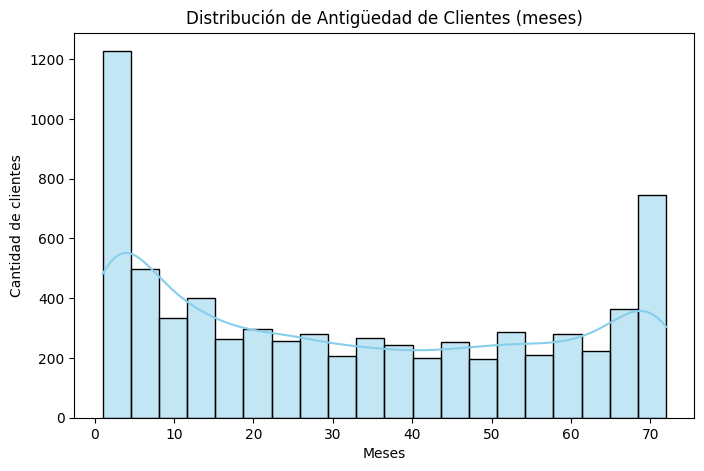

In [168]:
plt.figure(figsize=(8,5))
sns.histplot(df['antig√ºedad_meses'], bins=20, kde=True, color='skyblue')
plt.title('Distribuci√≥n de Antig√ºedad de Clientes (meses)')
plt.xlabel('Meses')
plt.ylabel('Cantidad de clientes')
plt.show()

#### Cargos mensulaes y totales

In [169]:
for col in ['cargos_mensuales', 'cargos_totales']:
    stats = df[col].describe()
    mediana = df[col].median()
    print(f"\n=== Estad√≠sticas de {col} ===")
    print(stats)
    print(f"Mediana: {mediana}")




=== Estad√≠sticas de cargos_mensuales ===
count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: cargos_mensuales, dtype: float64
Mediana: 70.35

=== Estad√≠sticas de cargos_totales ===
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: cargos_totales, dtype: float64
Mediana: 1397.475


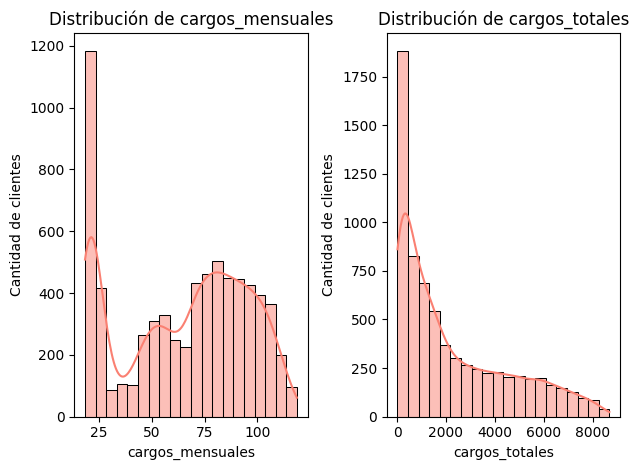

In [170]:
for i, col in enumerate(['cargos_mensuales', 'cargos_totales'], 1):
    plt.subplot(1, 2, i)
    sns.histplot(df[col], bins=20, kde=True, color='salmon')
    plt.title(f'Distribuci√≥n de {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad de clientes')

plt.tight_layout()
plt.show()

#### Cuentas diarias

In [171]:
stats = df['Cuentas_Diarias'].describe()
mediana = df['Cuentas_Diarias'].median()

print("=== Estad√≠sticas de Cuentas_Diarias ===")
print(stats)
print(f"Mediana: {mediana}")


=== Estad√≠sticas de Cuentas_Diarias ===
count    7032.000000
mean        2.159940
std         1.002866
min         0.608333
25%         1.186250
50%         2.345000
75%         2.995417
max         3.958333
Name: Cuentas_Diarias, dtype: float64
Mediana: 2.3449999999999998


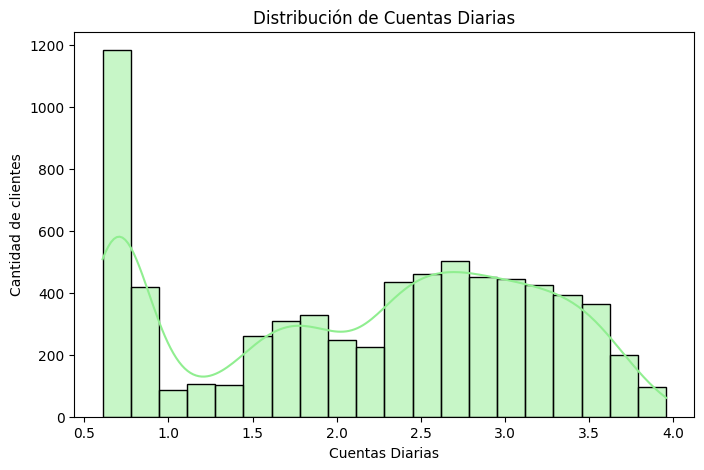

In [172]:
plt.figure(figsize=(8,5))
sns.histplot(df['Cuentas_Diarias'], bins=20, kde=True, color='lightgreen')
plt.title('Distribuci√≥n de Cuentas Diarias')
plt.xlabel('Cuentas Diarias')
plt.ylabel('Cantidad de clientes')
plt.show()


In [173]:
# Columnas num√©ricas que analizamos
columnas_numericas = ['antig√ºedad_meses', 'cargos_mensuales', 'cargos_totales', 'Cuentas_Diarias']

for col in columnas_numericas:
    media = df[col].mean()
    mediana = df[col].median()
    std = df[col].std()
    minimo = df[col].min()
    maximo = df[col].max()

    print(f"\n=== Resumen de {col} ===")
    print(f"Media: {media:.2f}")
    print(f"Mediana: {mediana:.2f}")
    print(f"Desviaci√≥n est√°ndar: {std:.2f}")
    print(f"M√≠nimo: {minimo}")
    print(f"M√°ximo: {maximo}")

    # Observaciones autom√°ticas
    if media > mediana:
        print("Observaci√≥n: la media es mayor que la mediana ‚Üí posible sesgo hacia valores altos.")
    elif media < mediana:
        print("Observaci√≥n: la media es menor que la mediana ‚Üí posible sesgo hacia valores bajos.")
    else:
        print("Observaci√≥n: media y mediana son similares ‚Üí distribuci√≥n sim√©trica aproximada.")

    if std > media*0.5:
        print("Observaci√≥n: alta variabilidad en los datos.")
    else:
        print("Observaci√≥n: variabilidad moderada en los datos.")


=== Resumen de antig√ºedad_meses ===
Media: 32.42
Mediana: 29.00
Desviaci√≥n est√°ndar: 24.55
M√≠nimo: 1
M√°ximo: 72
Observaci√≥n: la media es mayor que la mediana ‚Üí posible sesgo hacia valores altos.
Observaci√≥n: alta variabilidad en los datos.

=== Resumen de cargos_mensuales ===
Media: 64.80
Mediana: 70.35
Desviaci√≥n est√°ndar: 30.09
M√≠nimo: 18.25
M√°ximo: 118.75
Observaci√≥n: la media es menor que la mediana ‚Üí posible sesgo hacia valores bajos.
Observaci√≥n: variabilidad moderada en los datos.

=== Resumen de cargos_totales ===
Media: 2283.30
Mediana: 1397.47
Desviaci√≥n est√°ndar: 2266.77
M√≠nimo: 18.8
M√°ximo: 8684.8
Observaci√≥n: la media es mayor que la mediana ‚Üí posible sesgo hacia valores altos.
Observaci√≥n: alta variabilidad en los datos.

=== Resumen de Cuentas_Diarias ===
Media: 2.16
Mediana: 2.34
Desviaci√≥n est√°ndar: 1.00
M√≠nimo: 0.6083333333333333
M√°ximo: 3.9583333333333335
Observaci√≥n: la media es menor que la mediana ‚Üí posible sesgo hacia valores bajo

#### Columnas categor√≠cas

In [174]:
columnas_categoricas = df.select_dtypes(include=['object', 'bool']).columns

for col in columnas_categoricas:
    print(f"\n=== Columna: {col} ===")

    # Frecuencia absoluta
    print("\nFrecuencia absoluta:")
    print(df[col].value_counts())

    # Frecuencia relativa
    print("\nFrecuencia relativa (%):")
    print(df[col].value_counts(normalize=True) * 100)



=== Columna: ID_cliente ===

Frecuencia absoluta:
ID_cliente
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
             ..
0018-NYROU    1
0017-IUDMW    1
0017-DINOC    1
0016-QLJIS    1
0015-UOCOJ    1
Name: count, Length: 7032, dtype: int64

Frecuencia relativa (%):
ID_cliente
9995-HOTOH    0.014221
0002-ORFBO    0.014221
0003-MKNFE    0.014221
0004-TLHLJ    0.014221
0011-IGKFF    0.014221
                ...   
0018-NYROU    0.014221
0017-IUDMW    0.014221
0017-DINOC    0.014221
0016-QLJIS    0.014221
0015-UOCOJ    0.014221
Name: proportion, Length: 7032, dtype: float64

=== Columna: g√©nero ===

Frecuencia absoluta:
g√©nero
hombre    3549
mujer     3483
Name: count, dtype: int64

Frecuencia relativa (%):
g√©nero
hombre    50.469283
mujer     49.530717
Name: proportion, dtype: float64

=== Columna: servicio_internet ===

Frecuencia absoluta:
servicio_internet
fibra √≥ptica    3096
dsl             2416
sin servicio    1520
Name: count, dtype: int64


/tmp/ipython-input-3157250395.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


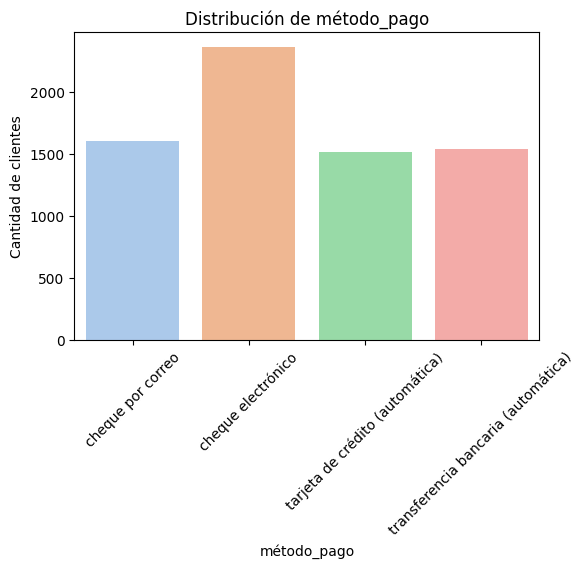

In [175]:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Distribuci√≥n de {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad de clientes')
    plt.xticks(rotation=45)
    plt.show()

### Distribuci√≥n de evasi√≥n

In [176]:
print("=== Frecuencia absoluta de Churn ===")
print(df['Churn'].value_counts(dropna=False))

=== Frecuencia absoluta de Churn ===
Churn
0    5163
1    1869
Name: count, dtype: int64


In [177]:
print("=== Frecuencia relativa de Churn (%) ===")
print(df['Churn'].value_counts(normalize=True) * 100)

=== Frecuencia relativa de Churn (%) ===
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


/tmp/ipython-input-2843777470.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='pastel')


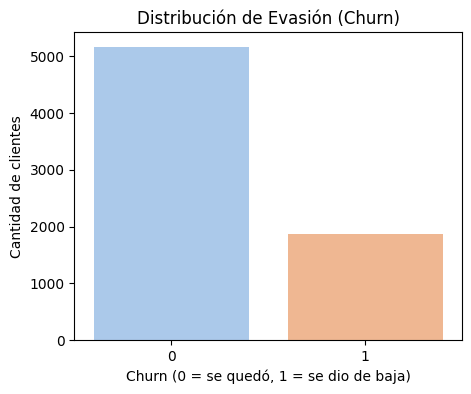

In [178]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Churn', palette='pastel')
plt.title('Distribuci√≥n de Evasi√≥n (Churn)')
plt.xlabel('Churn (0 = se qued√≥, 1 = se dio de baja)')
plt.ylabel('Cantidad de clientes')
plt.show()

### Recuento de evasi√≥n por variables categ√≥ricas

In [179]:
# Columnas categ√≥ricas a analizar (excluyendo Churn)
columnas_categoricas = df.select_dtypes(include=['object', 'bool']).columns.drop('Churn', errors='ignore')

for col in columnas_categoricas:
    print(f"\n=== Recuento de Churn por {col} ===")

    # Tabla cruzada: conteo absoluto
    crosstab = pd.crosstab(df[col], df['Churn'])
    print("\nConteo absoluto:")
    print(crosstab)

    # Tabla cruzada: porcentaje de churn
    crosstab_perc = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
    print("\nPorcentaje de churn por categor√≠a (%):")
    print(crosstab_perc)




=== Recuento de Churn por ID_cliente ===

Conteo absoluto:
Churn       0  1
ID_cliente      
0002-ORFBO  1  0
0003-MKNFE  1  0
0004-TLHLJ  0  1
0011-IGKFF  0  1
0013-EXCHZ  0  1
...        .. ..
9987-LUTYD  1  0
9992-RRAMN  0  1
9992-UJOEL  1  0
9993-LHIEB  1  0
9995-HOTOH  1  0

[7032 rows x 2 columns]

Porcentaje de churn por categor√≠a (%):
Churn           0      1
ID_cliente              
0002-ORFBO  100.0    0.0
0003-MKNFE  100.0    0.0
0004-TLHLJ    0.0  100.0
0011-IGKFF    0.0  100.0
0013-EXCHZ    0.0  100.0
...           ...    ...
9987-LUTYD  100.0    0.0
9992-RRAMN    0.0  100.0
9992-UJOEL  100.0    0.0
9993-LHIEB  100.0    0.0
9995-HOTOH  100.0    0.0

[7032 rows x 2 columns]

=== Recuento de Churn por g√©nero ===

Conteo absoluto:
Churn      0    1
g√©nero           
hombre  2619  930
mujer   2544  939

Porcentaje de churn por categor√≠a (%):
Churn           0          1
g√©nero                      
hombre  73.795435  26.204565
mujer   73.040482  26.959518

=== Recuento d

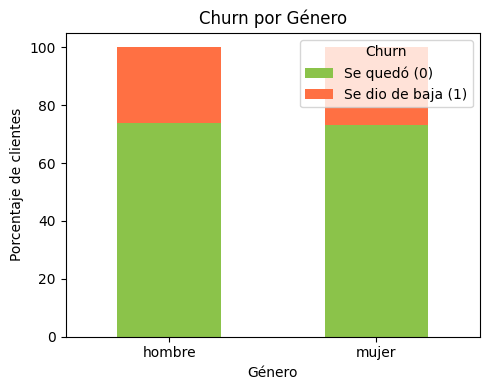

In [180]:
# Tabla cruzada en porcentaje por g√©nero
crosstab_gen = pd.crosstab(df['g√©nero'], df['Churn'], normalize='index') * 100

# Gr√°fico de barras apiladas
crosstab_gen.plot(
    kind='bar',
    stacked=True,
    figsize=(5, 4),
    color=['#8BC34A', '#FF7043']  # verde para 0, rojo coral para 1
)

plt.title('Churn por G√©nero')
plt.xlabel('G√©nero')
plt.ylabel('Porcentaje de clientes')
plt.legend(title='Churn', labels=['Se qued√≥ (0)', 'Se dio de baja (1)'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

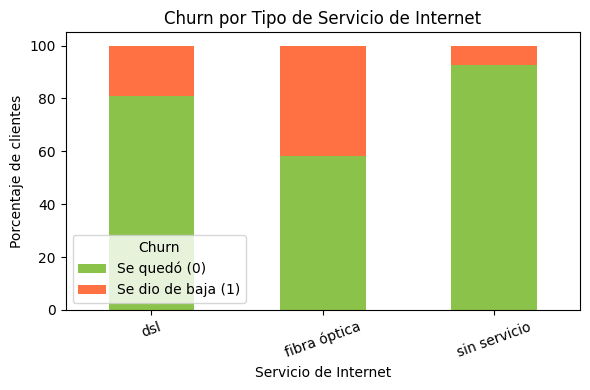

In [181]:
# Tabla cruzada en porcentaje por servicio de internet
crosstab_servicio = pd.crosstab(df['servicio_internet'], df['Churn'], normalize='index') * 100

# Gr√°fico de barras apiladas
crosstab_servicio.plot(
    kind='bar',
    stacked=True,
    figsize=(6, 4),
    color=['#8BC34A', '#FF7043']  # verde para 0, rojo coral para 1
)

plt.title('Churn por Tipo de Servicio de Internet')
plt.xlabel('Servicio de Internet')
plt.ylabel('Porcentaje de clientes')
plt.legend(title='Churn', labels=['Se qued√≥ (0)', 'Se dio de baja (1)'])
plt.xticks(rotation=20)  # ligera rotaci√≥n para que no se corten etiquetas
plt.tight_layout()
plt.show()

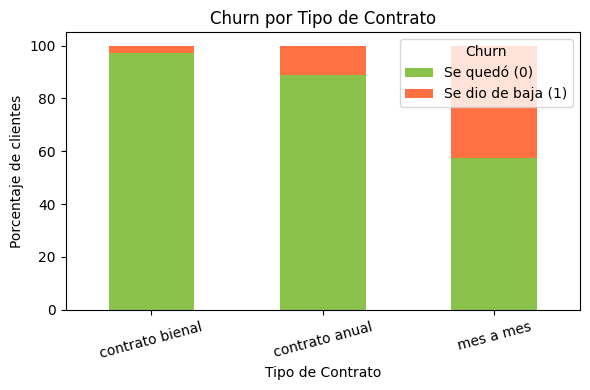

In [182]:
# Tabla cruzada en porcentaje por contrato
crosstab_contrato = pd.crosstab(df['contrato'], df['Churn'], normalize='index') * 100

# Reordenar por porcentaje de Churn=1 (de menor a mayor)
crosstab_contrato = crosstab_contrato.sort_values(by=1, ascending=True)

# Gr√°fico de barras apiladas
crosstab_contrato.plot(
    kind='bar',
    stacked=True,
    figsize=(6, 4),
    color=['#8BC34A', '#FF7043']  # verde para 0, rojo coral para 1
)

plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Porcentaje de clientes')
plt.legend(title='Churn', labels=['Se qued√≥ (0)', 'Se dio de baja (1)'])
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

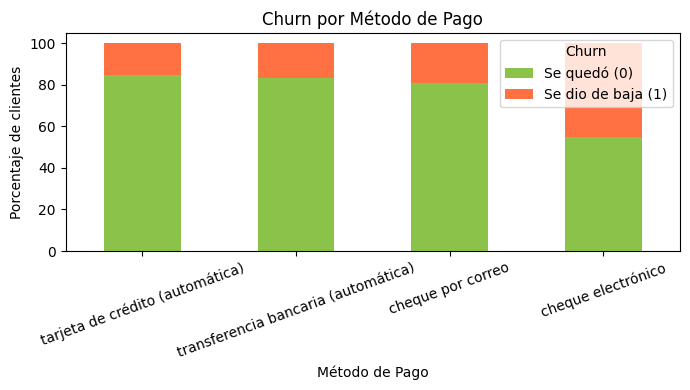

In [183]:
# Tabla cruzada en porcentaje por m√©todo de pago
crosstab_pago = pd.crosstab(df['m√©todo_pago'], df['Churn'], normalize='index') * 100

# Reordenar por porcentaje de Churn=1 (de menor a mayor)
crosstab_pago = crosstab_pago.sort_values(by=1, ascending=True)

# Gr√°fico de barras apiladas
crosstab_pago.plot(
    kind='bar',
    stacked=True,
    figsize=(7, 4),
    color=['#8BC34A', '#FF7043']  # verde para 0, rojo coral para 1
)

plt.title('Churn por M√©todo de Pago')
plt.xlabel('M√©todo de Pago')
plt.ylabel('Porcentaje de clientes')
plt.legend(title='Churn', labels=['Se qued√≥ (0)', 'Se dio de baja (1)'])
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

#### Conteo de evasi√≥n por variables n√∫mericas

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns


In [185]:
print("=== antig√ºedad_meses por Churn ===")
print(df.groupby('Churn')['antig√ºedad_meses'].describe())



=== antig√ºedad_meses por Churn ===
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
0      5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


/tmp/ipython-input-410230036.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


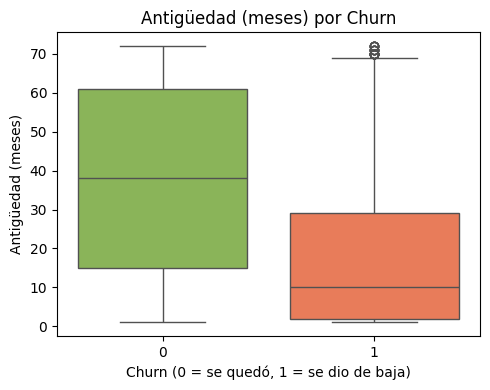

In [186]:
plt.figure(figsize=(5, 4))
sns.boxplot(
    data=df,
    x='Churn',
    y='antig√ºedad_meses',
    order=[0, 1],
    palette=['#8BC34A', '#FF7043']  # 0=verde (se qued√≥), 1=rojo (se dio de baja)
)
plt.title('Antig√ºedad (meses) por Churn')
plt.xlabel('Churn (0 = se qued√≥, 1 = se dio de baja)')
plt.ylabel('Antig√ºedad (meses)')
plt.tight_layout()
plt.show()


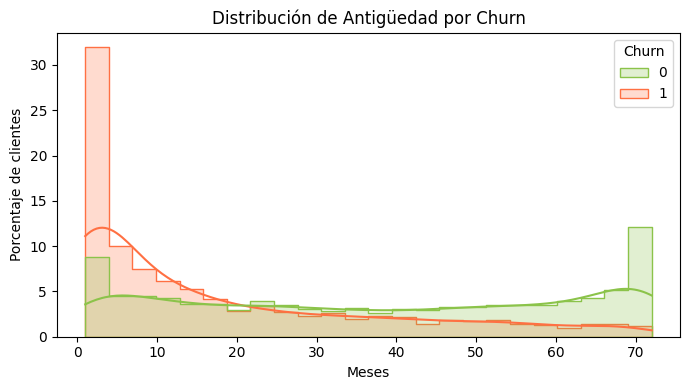

In [187]:
plt.figure(figsize=(7, 4))
sns.histplot(
    data=df,
    x='antig√ºedad_meses',
    hue='Churn',
    hue_order=[0, 1],
    bins=24,
    stat='percent',
    common_norm=False,
    kde=True,
    element='step',
    palette=['#8BC34A', '#FF7043']
)
plt.title('Distribuci√≥n de Antig√ºedad por Churn')
plt.xlabel('Meses')
plt.ylabel('Porcentaje de clientes')
plt.tight_layout()
plt.show()

In [188]:
print("=== cargos_mensuales por Churn ===")
print(df.groupby('Churn')['cargos_mensuales'].describe())



=== cargos_mensuales por Churn ===
        count       mean        std    min    25%    50%     75%     max
Churn                                                                   
0      5163.0  61.307408  31.094557  18.25  25.10  64.45  88.475  118.75
1      1869.0  74.441332  24.666053  18.85  56.15  79.65  94.200  118.35


/tmp/ipython-input-2599316094.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


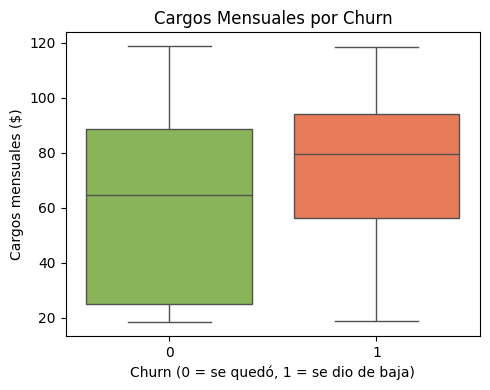

In [189]:
plt.figure(figsize=(5, 4))
sns.boxplot(
    data=df,
    x='Churn',
    y='cargos_mensuales',
    order=[0, 1],
    palette=['#8BC34A', '#FF7043']
)
plt.title('Cargos Mensuales por Churn')
plt.xlabel('Churn (0 = se qued√≥, 1 = se dio de baja)')
plt.ylabel('Cargos mensuales ($)')
plt.tight_layout()
plt.show()


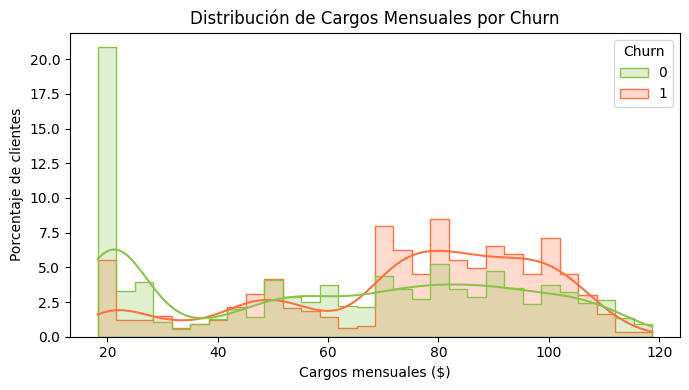

In [190]:
plt.figure(figsize=(7, 4))
sns.histplot(
    data=df,
    x='cargos_mensuales',
    hue='Churn',
    hue_order=[0, 1],
    bins=30,
    stat='percent',
    common_norm=False,
    kde=True,
    element='step',
    palette=['#8BC34A', '#FF7043']
)
plt.title('Distribuci√≥n de Cargos Mensuales por Churn')
plt.xlabel('Cargos mensuales ($)')
plt.ylabel('Porcentaje de clientes')
plt.tight_layout()
plt.show()

In [191]:
print("=== cargos_totales por Churn ===")
print(df.groupby('Churn')['cargos_totales'].describe())


=== cargos_totales por Churn ===
        count         mean          std    min      25%      50%       75%  \
Churn                                                                        
0      5163.0  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125   
1      1869.0  1531.796094  1890.822994  18.85  134.500   703.55  2331.300   

           max  
Churn           
0      8672.45  
1      8684.80  


/tmp/ipython-input-2683365450.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


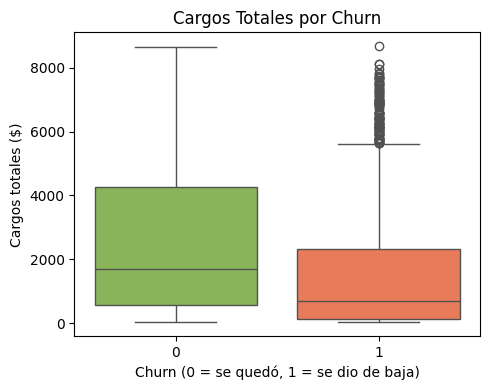

In [192]:
plt.figure(figsize=(5, 4))
sns.boxplot(
    data=df,
    x='Churn',
    y='cargos_totales',
    order=[0, 1],
    palette=['#8BC34A', '#FF7043']
)
plt.title('Cargos Totales por Churn')
plt.xlabel('Churn (0 = se qued√≥, 1 = se dio de baja)')
plt.ylabel('Cargos totales ($)')
plt.tight_layout()
plt.show()


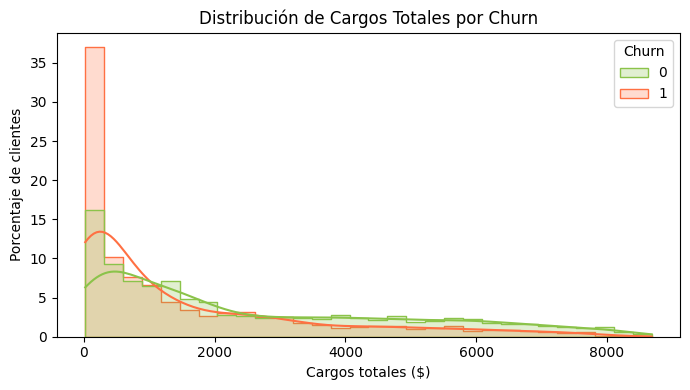

In [193]:
plt.figure(figsize=(7, 4))
sns.histplot(
    data=df,
    x='cargos_totales',
    hue='Churn',
    hue_order=[0, 1],
    bins=30,
    stat='percent',
    common_norm=False,
    kde=True,
    element='step',
    palette=['#8BC34A', '#FF7043']
)
plt.title('Distribuci√≥n de Cargos Totales por Churn')
plt.xlabel('Cargos totales ($)')
plt.ylabel('Porcentaje de clientes')
plt.tight_layout()
plt.show()

In [194]:
print("=== Cuentas_Diarias por Churn ===")
print(df.groupby('Churn')['Cuentas_Diarias'].describe())



=== Cuentas_Diarias por Churn ===
        count      mean       std       min       25%       50%       75%  \
Churn                                                                       
0      5163.0  2.043580  1.036485  0.608333  0.836667  2.148333  2.949167   
1      1869.0  2.481378  0.822202  0.628333  1.871667  2.655000  3.140000   

            max  
Churn            
0      3.958333  
1      3.945000  


/tmp/ipython-input-2990503831.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


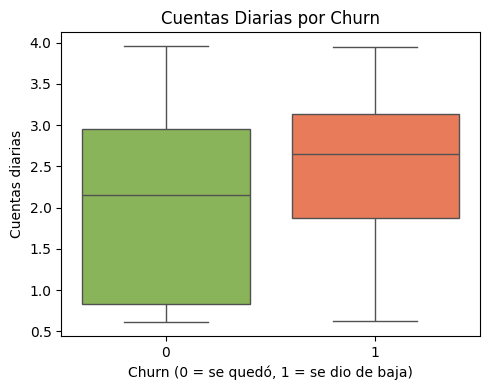

In [195]:
plt.figure(figsize=(5, 4))
sns.boxplot(
    data=df,
    x='Churn',
    y='Cuentas_Diarias',
    order=[0, 1],
    palette=['#8BC34A', '#FF7043']
)
plt.title('Cuentas Diarias por Churn')
plt.xlabel('Churn (0 = se qued√≥, 1 = se dio de baja)')
plt.ylabel('Cuentas diarias')
plt.tight_layout()
plt.show()


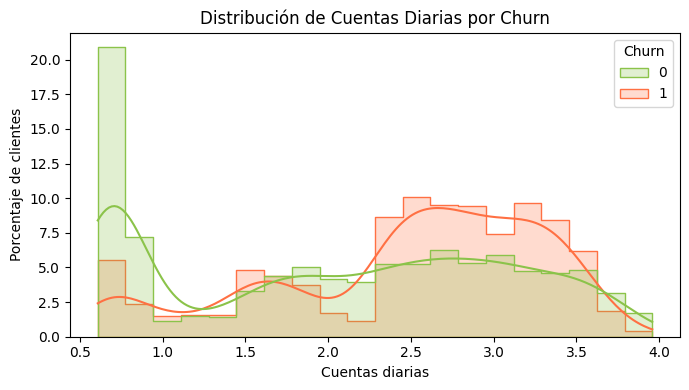

In [196]:
plt.figure(figsize=(7, 4))
sns.histplot(
    data=df,
    x='Cuentas_Diarias',
    hue='Churn',
    hue_order=[0, 1],
    bins=20,
    stat='percent',
    common_norm=False,
    kde=True,
    element='step',
    palette=['#8BC34A', '#FF7043']
)
plt.title('Distribuci√≥n de Cuentas Diarias por Churn')
plt.xlabel('Cuentas diarias')
plt.ylabel('Porcentaje de clientes')
plt.tight_layout()
plt.show()

INFORME FINAL



1. Introducci√≥n

El presente informe tiene como objetivo analizar el comportamiento de los clientes de la compa√±√≠a, con un enfoque especial en la evasi√≥n (Churn).
Se realizaron an√°lisis descriptivos de variables num√©ricas y categ√≥ricas, as√≠ como evaluaciones espec√≠ficas para entender qu√© factores podr√≠an estar asociados con la cancelaci√≥n del servicio.

El lenguaje t√©cnico se acompa√±a de explicaciones simples para que cualquier lector, incluso sin experiencia en ciencia de datos, pueda interpretar las conclusiones.


---

2. An√°lisis Descriptivo General

2.1 Variables Num√©ricas (visi√≥n global)

Se calcularon m√©tricas como media, mediana, desviaci√≥n est√°ndar, valores m√≠nimos y m√°ximos para cuatro variables clave:

Variable	Media	Mediana	Desviaci√≥n Est√°ndar	Min	Max	Observaciones

Antig√ºedad (meses)	32.42	29.00	24.55	1	72	Media > mediana ‚Üí sesgo hacia valores altos; alta variabilidad
Cargos mensuales	64.80	70.35	30.09	18.25	118.75	Media < mediana ‚Üí sesgo hacia valores bajos; variabilidad moderada
Cargos totales	2283.30	1397.47	2266.77	18.8	8684.8	Media > mediana ‚Üí sesgo hacia valores altos; alta variabilidad
Cuentas Diarias	2.16	2.34	1.00	0.61	3.96	Media < mediana ‚Üí sesgo hacia valores bajos; variabilidad moderada


üìåLos datos muestran que hay clientes con muy poca y mucha antig√ºedad, as√≠ como altas diferencias en el gasto total, lo que indica grupos de clientes muy distintos entre s√≠.


---

2.2 Variables Categ√≥ricas (visi√≥n global)

G√©nero: Distribuci√≥n equilibrada (Hombres: 50.47%, Mujeres: 49.53%).

Servicio de Internet: Fibra √≥ptica (44.03%), DSL (34.36%), sin servicio (21.62%).

Tipo de contrato: Predomina mes a mes (55.11%), seguido de contrato bienal (23.96%) y anual (20.93%).

M√©todo de pago: Mayor uso de cheque electr√≥nico (33.63%), seguido por otros m√©todos en proporciones similares (~22%).


üìåEl cliente t√≠pico puede ser de cualquier g√©nero, pero hay preferencia por contratos mes a mes y fibra √≥ptica como tipo de conexi√≥n.


---

3. An√°lisis de Evasi√≥n (Churn)

3.1 Distribuci√≥n General

Clientes que permanecen: 73.42%

Clientes que cancelaron: 26.58%


üìå Esto indica que 1 de cada 4 clientes ha cancelado el servicio.


---

3.2 Evasi√≥n por Variables Categ√≥ricas

G√©nero: No hay diferencias significativas en evasi√≥n entre hombres y mujeres.

Servicio de Internet: Clientes con fibra √≥ptica presentan una tasa de evasi√≥n m√°s alta que DSL o quienes no tienen servicio.

Tipo de contrato: Los clientes con contrato mes a mes tienen una tasa de evasi√≥n considerablemente mayor, mientras que contratos anuales o bienales retienen m√°s clientes.

M√©todo de pago: El uso de cheque electr√≥nico est√° asociado con mayor evasi√≥n en comparaci√≥n con m√©todos autom√°ticos.



---

3.3 Evasi√≥n por Variables Num√©ricas

Cargos Mensuales

Churn = 1 (cancelaron): Media de 74.44

Churn = 0 (permanecen): Media de 61.31
üìå Clientes que pagan m√°s al mes tienden a cancelar con m√°s frecuencia.


Cargos Totales

Churn = 1: Media de 1531.79

Churn = 0: Media de 2555.34
üìå Los clientes que permanecen tienen un gasto total acumulado m√°s alto, posiblemente porque han estado m√°s tiempo en la compa√±√≠a.


Cuentas Diarias

Churn = 1: Media de 2.48

Churn = 0: Media de 2.04
üìå Un mayor n√∫mero de cuentas diarias parece correlacionarse con una mayor evasi√≥n, pero la diferencia no es tan marcada como en cargos mensuales.



---

CONCLUSION

1. Factor Contrato: El tipo de contrato es uno de los principales predictores de evasi√≥n. Contratos mes a mes tienen mayor rotaci√≥n.


2. Costo Mensual: Clientes con cargos mensuales altos tienden a irse m√°s r√°pido.


3. Servicio de Internet: Fibra √≥ptica muestra m√°s evasi√≥n que DSL, lo que podr√≠a indicar problemas de satisfacci√≥n o precio.


4. M√©todo de pago: Pagos manuales, especialmente por cheque electr√≥nico, se asocian con mayor cancelaci√≥n.


5. Perfil del Cliente con Mayor Riesgo: Contrato mes a mes + fibra √≥ptica + pago por cheque electr√≥nico + cargos mensuales altos.




---

5. Recomendaciones Estrat√©gicas

Fidelizar clientes con contratos mes a mes: ofrecer descuentos o beneficios para migrar a contratos m√°s largos.

Revisar precios y paquetes de fibra √≥ptica para reducir evasi√≥n en ese segmento.

Incentivar pagos autom√°ticos con beneficios, reduciendo la fricci√≥n de pago.

Analizar casos de altos cargos mensuales para ajustar precios o personalizar ofertas.



---

üìä En resumen:
Este an√°lisis muestra claramente que la evasi√≥n no es aleatoria, sino que est√° influenciada por factores espec√≠ficos. Comprenderlos permite dise√±ar estrategias focalizadas para reducir la p√©rdida de clientes y aumentar la retenci√≥n.


---

